# 提取将完全黑色的mask图像的深度 

In [1]:
import csv
import pandas as pd
import numpy as np
import cv2
import sys
import os
from tqdm import tqdm_notebook

did = []
dd = []
path_train = "./saltdata/train/"
train_csv_path = "./saltdata/train.csv"
depths_path = './saltdata/depths.csv'


def load_img(path):
    return cv2.imread(path)

def get_ids(csv_path):
    #list_id中保存的是训练图片的名称，但是没有后缀
    df = pd.read_csv(csv_path)
    list_id = []
    for i,item in df.iterrows():
        list_id.append(item[0]+".png")
    return list_id
def read_depths(csv_path):
    df = pd.read_csv(csv_path)
    list_id = []
    list_depths = []
    for i,item in df.iterrows():
        list_id.append(item[0])
        list_depths.append(item[1])
    return list_id, list_depths
def get_depths(id_, ids, depths):
    #list_id中保存的是训练图片的名称，但是没有后缀
    c = ids.index(id_)
    depth = depths[c]
    return id_, depth

train_ids = get_ids(train_csv_path)

ids, depths = read_depths(depths_path)

for n, id_ in tqdm_notebook(enumerate(train_ids), total=len(train_ids)):
    path = path_train
    mask = np.array(load_img(path + '/masks/' + id_))
    if not np.all(mask == 0):
        id_ = id_.split('.')[0]
        id_, depth = get_depths(id_, ids, depths)
        did.append(id_)
        dd.append(depth)
    idd = zip(did, dd)
print(len(idd))

# #python2可以用file替代open
# with open("mask_deep.csv","a") as csvfile: 
#     writer = csv.writer(csvfile)
#     writer.writerows(idd)
print('Done!')

A Jupyter Widget


2438
Done!


# 统计mask的分布

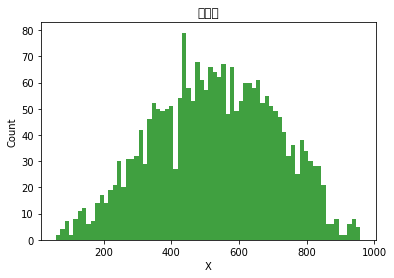

In [2]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

def init():
    mpl.rcParams['font.sans-serif'] = [u'SimHei']  # 正常显示中文（FangSong/黑体 FangSong/KaiTi）
    mpl.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 直方图
def zft(x):
    plt.figure(facecolor='w')
    plt.hist(x, bins=70, facecolor='green', align='mid', alpha=0.75)
    plt.xlabel('X')
    plt.ylabel('Count')
    plt.title('直方图')
    plt.show()

# 绘图示例
if __name__ == "__main__":
    init()

    zft(dd)

In [6]:
from matplotlib  import pyplot as plt

# 获取列表的第二个元素
def takeSecond(elem):
    return elem[1]
idd.sort(key=takeSecond)
for n, item in tqdm_notebook(enumerate(idd), total=len(idd)):
    
    img_mask = cv2.imread(path_train + 'masks/' + item[0] + '.png')
    print(path_train + 'masks' + item[0] + '.png')
    plt.figure(figsize=(50, 50)) 
    plt.xlabel(item[1])
    plt.imshow(img_mask)
    plt.savefig('./order/' + str(item[1]) + '.png')
    if (n+1)%25 == 0:      
        break


A Jupyter Widget

./saltdata/train/masks0b9981aba1.png
./saltdata/train/masksbc3156b1e4.png
./saltdata/train/masks06d21d76c4.png
./saltdata/train/masks4ad8a63538.png
./saltdata/train/masksda5ab3d506.png
./saltdata/train/masksb749a000ea.png
./saltdata/train/masksb7b83447c4.png
./saltdata/train/masksa37249665e.png
./saltdata/train/masksc5745e04ff.png
./saltdata/train/masks0b45bde756.png
./saltdata/train/masks80a458a2b6.png
./saltdata/train/masks4bb8260218.png
./saltdata/train/masksb1be1fa682.png
./saltdata/train/masksb6f907680a.png
./saltdata/train/masks62e608259a.png
./saltdata/train/masks0ddcd3fd1a.png
./saltdata/train/masksd4d34af4f7.png
./saltdata/train/masks66fed16154.png
./saltdata/train/masks50b3aef4c4.png
./saltdata/train/masks7c0b76979f.png
./saltdata/train/masksb6aa5c7ab4.png
./saltdata/train/masks70a32506ab.png
./saltdata/train/masks299ef808f6.png
./saltdata/train/masksed7251fc01.png
./saltdata/train/masks737e6513c8.png
